## DATA 245: HOMEWORK 2

### Ques 6: use sklearn.datasets import load_iris dataset. Can you show how the tree classification performances are affected by various ensemble techniques?

In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns

In [25]:
iris = load_iris()
df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df['target'] = iris.target
df['species'] = iris.target_names[iris.target]
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [26]:
iris.data.shape

(150, 4)

In [17]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [10]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [277]:
list(iris.target_names)
df.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


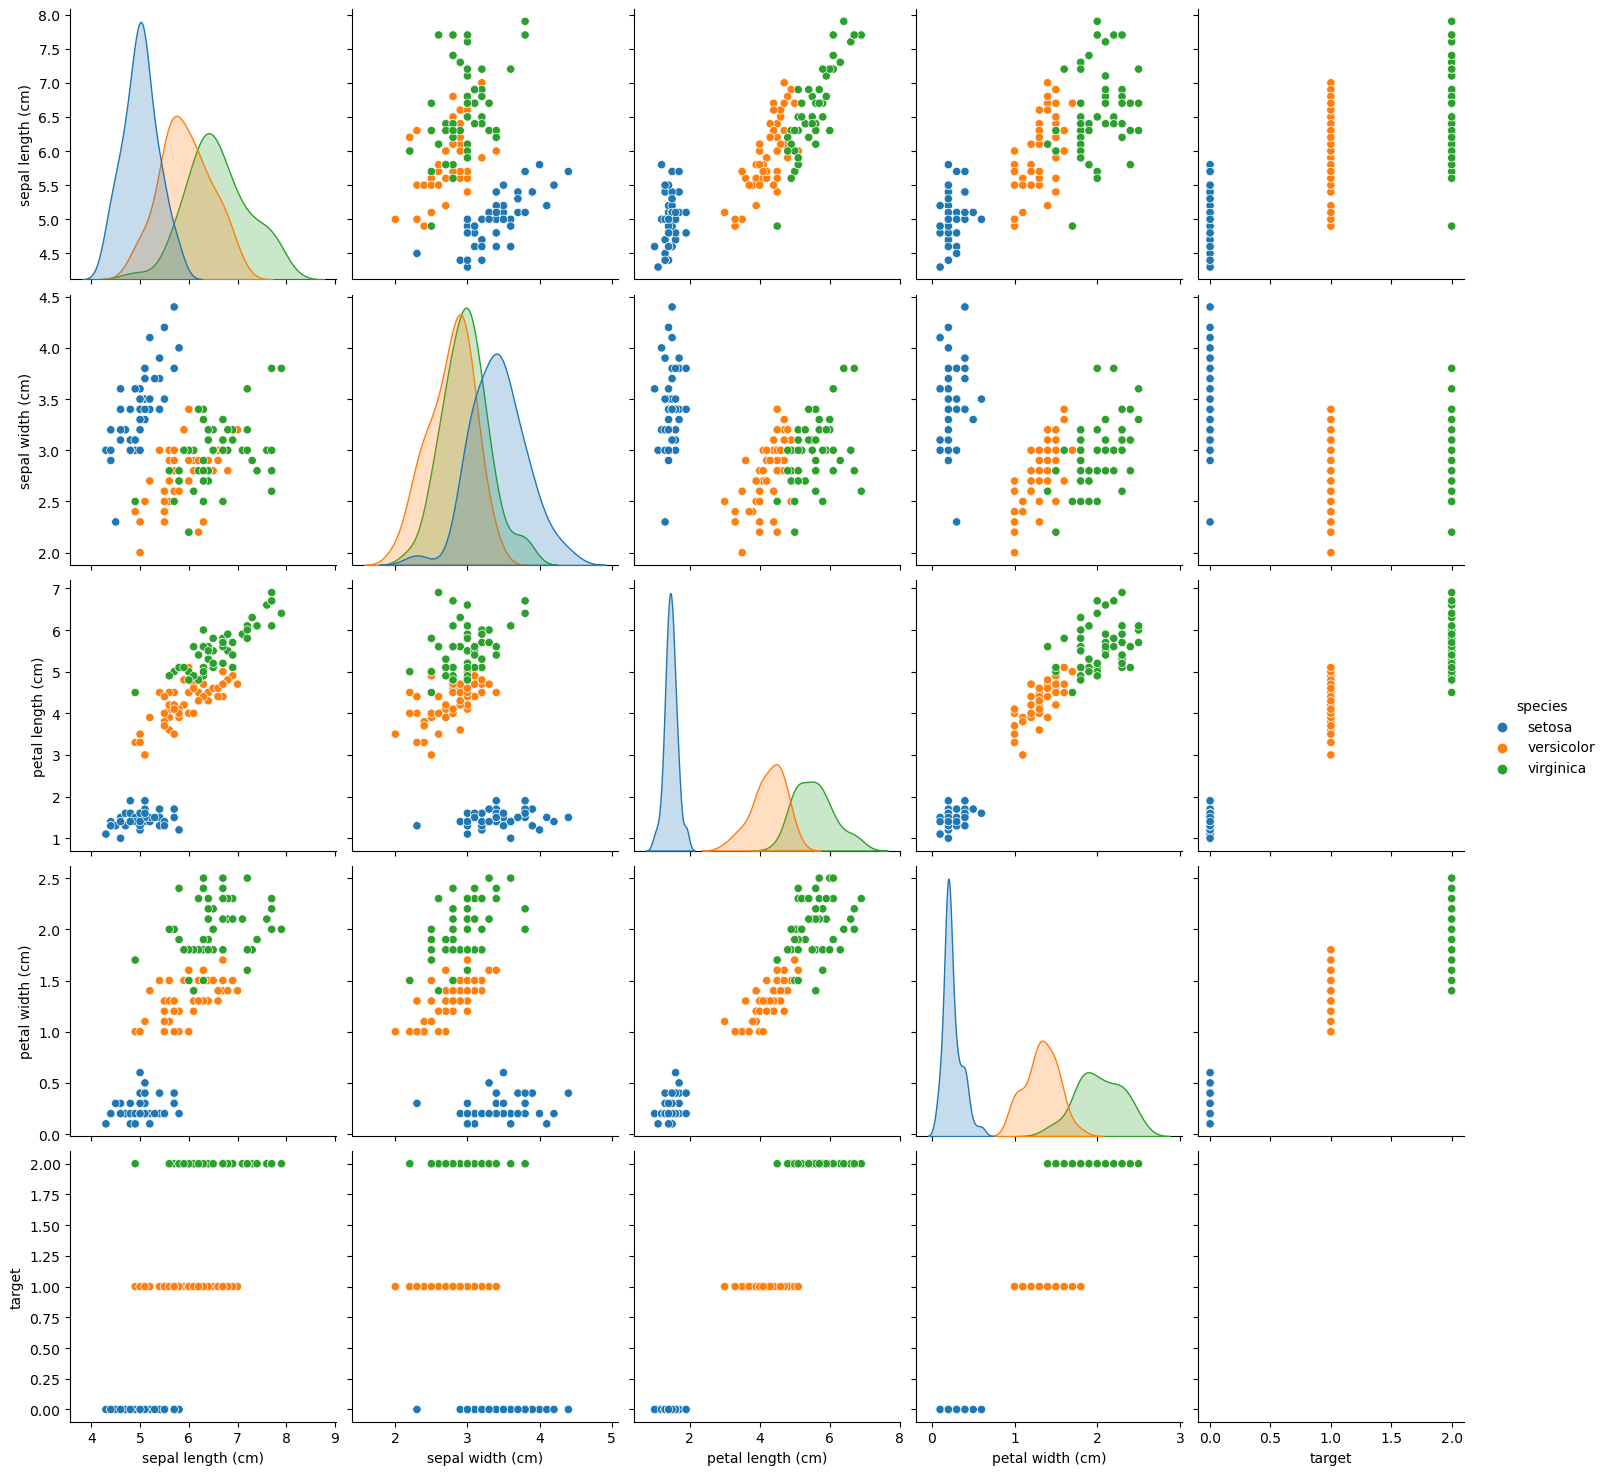

In [37]:
# Pairplot for pairwise relationships between features
sns.pairplot(df, hue="species", kind = 'scatter',size = 3)

We see that species iris-setosa has smallest petal length and petal width but larger sepal widths.However, we also see a positive corelation between petal length and petal width

In [61]:
#splitting the datset into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


#### Decision tree with max depth is 2

[Text(0.5, 0.75, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 74\nvalue = [0, 37, 37]')]

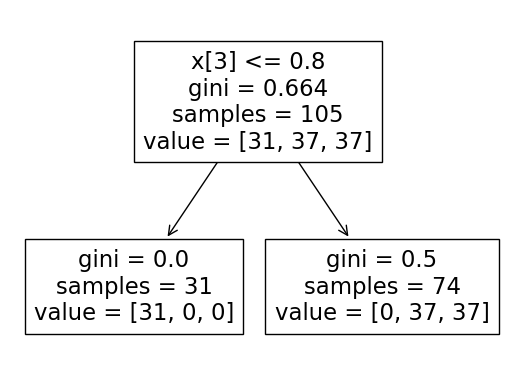

In [53]:
decision_tree = DecisionTreeClassifier(criterion= 'gini',min_samples_split= 1.0, max_depth= 2)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
tree.plot_tree(decision_tree)

#### Classification report for Decision Tree classifier

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Classification report:')
print(classification_report(y_test,y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      1.00      0.67        13
           2       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45



/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
#accuracy score
print(f'Accuracy score when Max Depth is 2: {accuracy_score(y_test,y_pred)* 100}')

Accuracy score when Max Depth is 2: 71.11111111111111


#### Decision Tree when no max depth is defined

[Text(0.5, 0.9, 'x[3] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [35, 34, 36]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(0.3076923076923077, 0.5, 'x[2] <= 4.95\ngini = 0.193\nsamples = 37\nvalue = [0, 33, 4]'),
 Text(0.15384615384615385, 0.3, 'x[0] <= 4.95\ngini = 0.061\nsamples = 32\nvalue = [0, 31, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.46153846153846156, 0.3, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.7692307692307693, 0.3, 'x[1] <= 3.

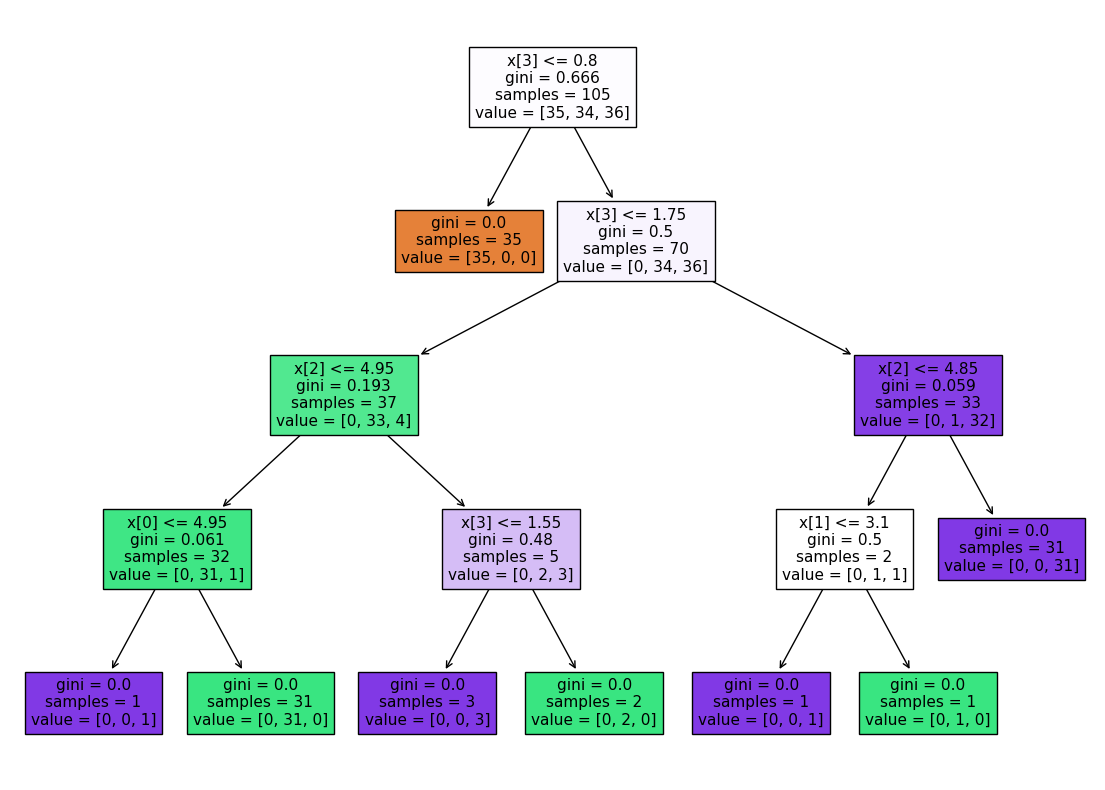

In [82]:
X1 = iris.data
y1 = iris.target
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30, random_state = 15)

decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X1_train, y1_train)
y_pred_max = decision_tree_clf.predict(X1_test)

plt.figure(figsize=(14,10))
tree.plot_tree(decision_tree_clf, filled= True)

In [126]:

print(f'accuracy score for Decision Tree without max depth : {accuracy_score(y_test,y_pred_max)* 100}')
#print(f'Ensemble Score of Decision Tree Classifier: {decision_tree_clf.score(X1,y1)}')

accuracy score for Decision Tree without max depth : 24.444444444444443


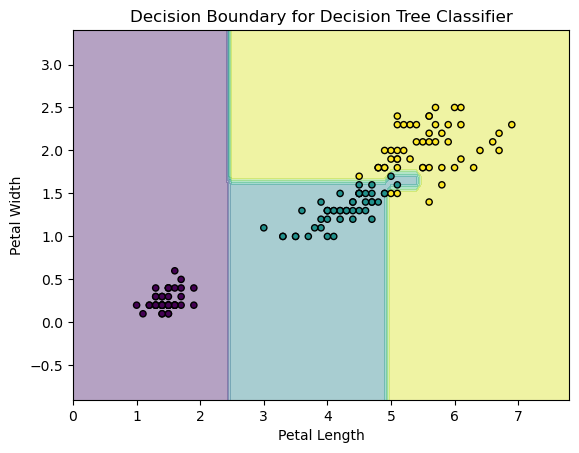

In [270]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # Take only the first two features for visualization
y = iris.target

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X, y)

# Create a meshgrid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class labels for each point in the meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary for Decision Tree Classifier')
plt.show()


### Trying Different Ensemble Techniques

#### 1. Bagging Classifier: Samples from data are taken with replacement

In [222]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
X =  iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [123]:
dt = DecisionTreeClassifier(random_state=42, criterion= 'gini')
bagging_classifier = BaggingClassifier(dt, n_estimators= 5 , max_samples= 15, n_jobs= -1, bootstrap= True)
bagging_classifier.fit(X_train, y_train)
y_pred_bag = bagging_classifier.predict(X_test)


In [127]:
accuracy = accuracy_score(y_test,y_pred_bag)
print(f'Accuracy of Bagging Classifier: {(accuracy)*100}')
#print(f'Ensemble Score of Bagging Classifier is {bagging_classifier.score(X,y)}')

Accuracy of Bagging Classifier: 95.55555555555556


In [271]:
print('Classification report:')
print(classification_report(y_test,y_pred_bag))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### We see that the accuracy has been improved by using Bagging classifier from 60% to 95%


### 2.RandomForest Classifier

In [186]:
rf_classifier = RandomForestClassifier(n_estimators= 100,  max_depth= 5)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)


In [187]:
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest Classifier: {(accuracy_rf)*100}')
#print(f'Ensemble Score of Random Forest Classifier is {rf_classifier.score(X,y)}')

Accuracy of Random Forest Classifier: 100.0


In [272]:
print('Classification report:')
print(classification_report(y_test,y_pred_rf))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### 3. Adaboost Classifier

In [220]:
base_est = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(base_est, n_estimators= 10, learning_rate= 0.01, algorithm= 'SAMME.R', random_state= 42)
ada_clf.fit(X_train, y_train)
y_pred_ada =  ada_clf.predict(X_test)

In [221]:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'Accuracy of Ada Boosting Classifier: {(accuracy_ada)*100}')

Accuracy of Ada Boosting Classifier: 100.0


In [273]:
print('Classification report:')
print(classification_report(y_test,y_pred_ada))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 4. Gradient Boosting

In [234]:
gb_clf = GradientBoostingClassifier(n_estimators= 10, learning_rate= 0.01, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

In [235]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy of Gradient Boosting Classifier: {(accuracy_gb)*100}')

Accuracy of Gradient Boosting Classifier: 100.0


In [274]:
print('Classification report:')
print(classification_report(y_test,y_pred_gb))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



##### We see that from above using multiple ensembling techniques like bagging and boosting approach i.e using Random Forest, Ada Boosting and Gradient Boosting classifiers, the accuracy is higher. Also, we see that accuracy given by boosting techniques gave higher accuracy than using bagging techniques.

### 5. Voting Classifier

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [268]:
X =  iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [263]:
dt = DecisionTreeClassifier()
svc = SVC()
knn = KNN()
classifiers = [('Classification Tree', dt),('Support Vector classification', svc),('K Nearest Neighbours', knn)]

for classifier_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{classifier_name}: {accuracy_score(y_test, y_pred)}')


Classification Tree: 1.0
Support Vector classification: 1.0
K Nearest Neighbours: 1.0


In [264]:
voting_clf = VotingClassifier(estimators=classifiers)
voting_clf.fit(X_train, y_train)
y_pred_vc = voting_clf.predict(X_test)
#print('Accuracy of Voting Classifier: {:.3f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))
print(f'Accuracy of Voting Classifier: {accuracy_score(y_test, y_pred_vc)*100}')

Accuracy of Voting Classifier: 100.0


In [275]:
print('Classification report:')
print(classification_report(y_test,y_pred_vc))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



##### We conclude that even using the voting classifiers(SVM, Decision Tree, KNN), the accuracy is higher than the simple decision tree classifier. 

#### Consequently, we reached the conclusion that using various ensembling techniques we can improve the accuracy or performances of the tree classification

#### Thank You!!